In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#load dataset
df = pd.read_csv("https://raw.githubusercontent.com/kennedyuche/linear-regression/main/housing_price_dataset.csv")

#view dataset
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [15]:
#explore dataset
df.shape

(50000, 6)

In [23]:
#explore dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [21]:
#explore the dataset
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [6]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
#Predict price using number of bedrooms

In [17]:
#preparing training data
y=df['Price']
x=df[['Bedrooms']]

In [19]:
#split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.3, random_state=42)

In [21]:
#instantiate the linear Regressor
model=LinearRegression()

In [23]:
#fit model to training data
model.fit(x_train, y_train)

LinearRegression()

In [27]:
x_test

,Bedrooms
33553,5
9427,5
199,4
12447,5
39489,2
...,...
15168,2
49241,2
39317,4
42191,2


In [25]:
#model evaluation
y_pred=model.predict(x_test)
y_pred

array([232416.77335039, 232416.77335039, 227327.39397566, ...,
       227327.39397566, 217148.63522622, 217148.63522622])

In [45]:
#measuring regression model performance
#compare actual value with predicted value
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

In [47]:
#interpreting coefficients
#just to print out the values
print(f"Slope:{round(model.coef_[0], 2)}")
print(f"Intercept:{round(model.intercept_, 2)}")
print(f"Mean Squared Error(MSE):{round(mse, 2)}")
print(f"R^2 Score:{r2}")

Slope:5089.38
Intercept:206969.88
Mean Squared Error(MSE):5752857445.97
R^2 Score:0.004618314093589149


<Axes: xlabel='Bedrooms', ylabel='Price'>

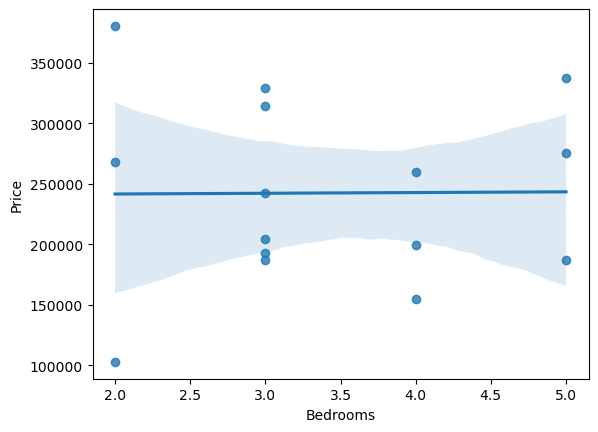

In [51]:
#to see what the regression plot looks like
reg_df=df[['Bedrooms', 'Price']]
reg_df_sample=reg_df.sample(15, random_state=2)
sns.regplot(x="Bedrooms", y="Price", data=reg_df_sample)

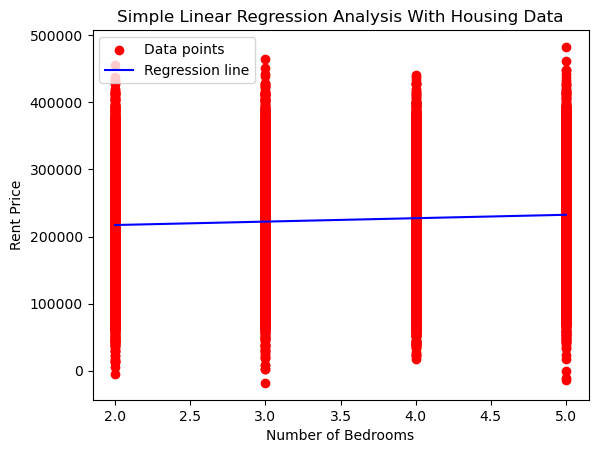

In [57]:
#visualize the SLR Line using scatter plot
plt.scatter(x_test, y_test, color='red', label='Data points')
plt.plot(x_test, y_pred, color='blue', label='Regression line')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent Price')
plt.title('Simple Linear Regression Analysis With Housing Data')
plt.legend()
plt.show()